# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [8]:
# Display a description of the dataset
display(data.describe())
#data.sort_values(['Fresh'], ascending = True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [9]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [71, 85, 99]
#71 might be a sandwich restaurant
#85 might be a midsize grocery store
#99 might be a small business corner shop or gas station


# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18291,1266,21042,5373,4173,14472
1,16117,46197,92780,1026,40827,2944
2,9658,2182,1909,5639,215,323


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
#71 might be a sandwich restaurant since the delicatessen purchases are much higher than the mean.
#85 might be a midsize grocery store.  The purchases Fresh, Milk, and Grocery are all well above the means.
#99 might be a small business corner shop or gas station.  In general, the purchases are low in most categories which would suggest this business may be smaller.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

#drop_field = 'Fresh'
#drop_field = 'Milk'
#drop_field = 'Grocery'
#drop_field = 'Frozen'
#drop_field = 'Detergents_Paper'
drop_field = 'Delicatessen'
new_data = data.drop([drop_field], axis = 1)
score_sum = 0
# Split the data into training and testing sets using the given feature as the target

for rand_i in range(0,100):    
    X_train, X_test, y_train, y_test =  train_test_split(new_data, data[drop_field], test_size=0.25, random_state=rand_i)
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=rand_i)
    regressor.fit(X_train, y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    score_sum = score_sum + score
    #print(score)
print('Average score across random states ranging from 0 to 99',score_sum/(len(range(0,100))))


('Average score across random states ranging from 0 to 99', -2.2333345241723128)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
Dropping Delicatessen and attempting to make predictions on the data resulted in a negative score (-2.233).  This suggests that this data is necessary to make correct predictions on the customer spending habit.  Dropped features that resulted in high scores (Grocery, Detergents_Paper) indicates that this data is not as important or necessary when trying to predict the customer spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

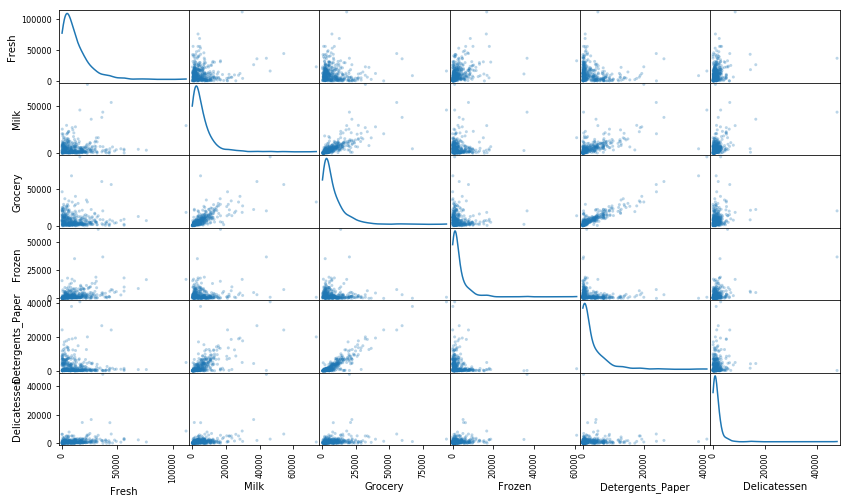

In [18]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
For most pairs of data, the points are clustered closer to zero in either the x or y axis.  For some cases though there exists a strong positive correlation.  The strongest correlation exists between Grocery and Detergents_Paper.  As one increase, the other increases.  Additionally there is a positive correlation between Grocery and Milk.

For each feature the data is not normally distributed as the curve does not resemble a bell curve.  Instead the data is skewed to the right where the majority of the data points are for each feature.  Outliers can also be identified as they exist further away from the peak of the curve (further away from the majority of the data points).


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

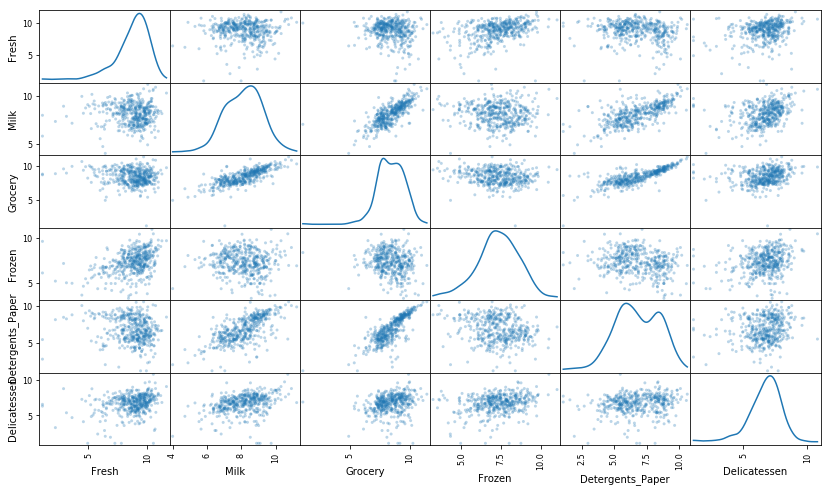

In [19]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [460]:
# Display the log-transformed sample data
display(log_samples)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.814164,7.143618,9.954276,8.589142,8.336390,9.579971
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,9.175542,7.687997,7.554335,8.637462,5.370638,5.777652


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [50]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
outlier_data = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    print "Q1 for {}: {}:".format(feature,Q1)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    print "Q3 for {}: {}:".format(feature,Q3)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 2
    print "Q1 - step of {} for {}: {}:".format(step,feature,Q1-step)
    print "Q3 + step of {} for {}: {}:".format(step,feature,Q3+step)
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_data.append(outlier)
    display(outlier)
    #Remove all outlier except those from the sample indices
    for idx in list(outlier.index.values):
        if idx != indices[0] and idx != indices[1]  and idx != indices[2]:
            outliers.append(idx)
    


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#display(log_data.describe())
print (indices)
print (outliers)

Q1 for Fresh: 8.04805870221:
Q3 for Fresh: 9.73706394795:
Q1 - step of 3.37801049148 for Fresh: 4.67004821074:
Q3 + step of 3.37801049148 for Fresh: 13.1150744394:
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
357,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134


Q1 for Milk: 7.33498124004:
Q3 for Milk: 8.88048008859:
Q1 - step of 3.09099769709 for Milk: 4.24398354295:
Q3 + step of 3.09099769709 for Milk: 11.9714777857:
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.43294,4.007333,4.919981,4.317488,1.94591,2.079442


Q1 for Grocery: 7.67461620137:
Q3 for Grocery: 9.27385367724:
Q1 - step of 3.19847495173 for Grocery: 4.47614124964:
Q3 + step of 3.19847495173 for Grocery: 12.472328629:
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Q1 for Frozen: 6.60967774917:
Q3 for Frozen: 8.17589608318:
Q1 - step of 3.13243666801 for Frozen: 3.47724108116:
Q3 + step of 3.13243666801 for Frozen: 11.3083327512:
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Q1 for Detergents_Paper: 5.54810142479:
Q3 for Detergents_Paper: 8.27434059875:
Q1 - step of 5.45247834792 for Detergents_Paper: 0.0956230768735:
Q3 + step of 5.45247834792 for Detergents_Paper: 13.7268189467:
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Q1 for Delicatessen: 6.01187465693:
Q3 for Delicatessen: 7.50672842655:
Q1 - step of 2.98970753923 for Delicatessen: 3.0221671177:
Q3 + step of 2.98970753923 for Delicatessen: 10.4964359658:
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910
285,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372


[71, 85, 99]
[65, 66, 95, 96, 218, 338, 357, 412, 154, 75, 420, 109, 128, 142, 154, 183, 184, 187, 203, 233, 285]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
I defined the step threshhold to be (Q3 - Q1) * 2.5.  Using the multiplier of 1.5 created too many outliers (around 10% of the data was flagged as an outlier).  By increasing the multiplier to 2.0, I reduced the outliers to 21/440.
All datapoints that were outside of the Q1 + step threshhold or Q3 + step threshhold were removed, unless they were already selected in the samples array.  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4972
Dimension 2    0.7309
Dimension 3    0.8353
Dimension 4    0.9342
Dimension 5    0.9791
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


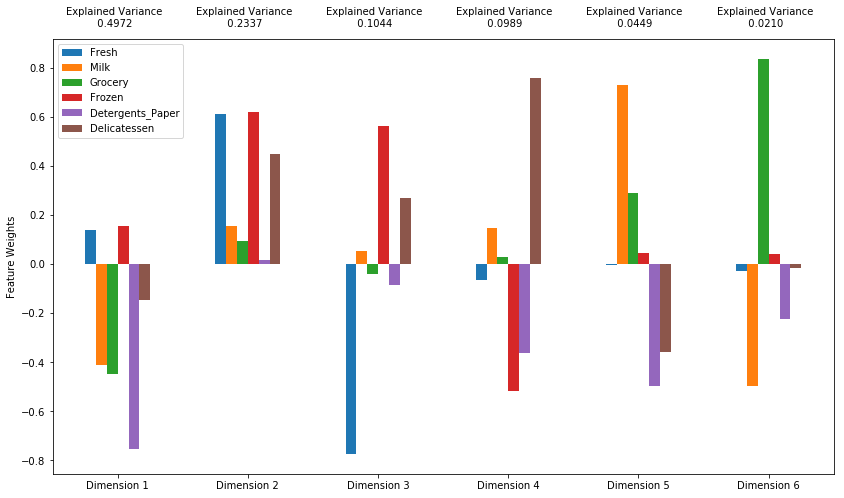

In [51]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The first two principal components, Dimension 1 and Dimension 2, have a total variance of 0.7309.
The first four principal components have a total variance of 0.9342.

The first principal component is strongly correlated with Detergents_Paper, Grocery, and Milk.  Increases in spending on one of these categories implies that other strongly correlated categories will have an increase.  These types of establishments may be the distributors or retailers. Additionally, they are less likely to spend money on Fresh and Frozen items

The second principal component better represents customer spending on Fresh, Frozen, and Delicatessen.  This component describes establishments that are likely restaurants.  While they may spend on Milk, Grocery, and Detergents_Paper, the amount is low as the weights are much smaller.

The third principal component shows customers spending on Milk, Frozen, and Delicatessen will spend less on Fresh.  These establishments are likely to be smaller grocery stores or corner stores.

The fourth principal component shows customers spending on Delicatessen (strong weight) will spend less on Frozen and Detergents_Paper.  These may be small sandwich shops.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [52]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.5003,2.6274,0.4735,0.7765,-1.9932,1.4028
1,-5.4068,1.5445,-0.8415,0.1727,0.4424,0.3185
2,2.0472,0.3687,0.3473,-1.0090,0.5451,-0.1420


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [53]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [54]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.5003,2.6274
1,-5.4068,1.5445
2,2.0472,0.3687


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

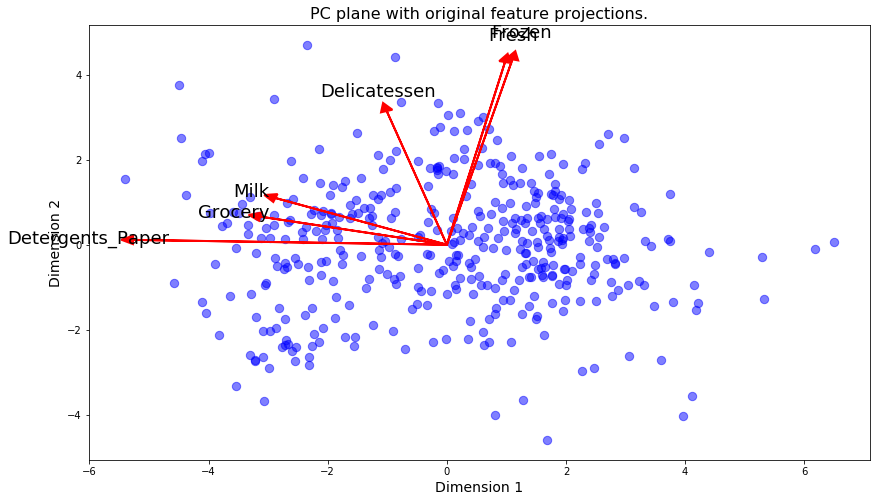

In [67]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

http://scikit-learn.org/stable/modules/clustering.html

K-means is fast and simple compared to GMM.  It simply requires the number of clusters and scales well.  GMM on the other hand requires many paramters and does not scale well and is computationally more expensive.

K-means performs hard clustering.  The clusters do not overlap, and data points can only belong to one cluster.  Clusters are exclusive. 

GMM does soft clustering. Soft Clustering is where clusters can overlap.

Looking at the biplot, there does not appear to be distinct clusters.  This would suggest using GMM, but for simplicity and speed, I will elect to use K-means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_ 

# predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print score

0.439802151702


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
n_clusters = 2: 0.439
n_clusters = 3: 0.346
n_clusters = 4: 0.327
n_clusters = 5: 0.352

n_clusters = 2 yields the highest silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

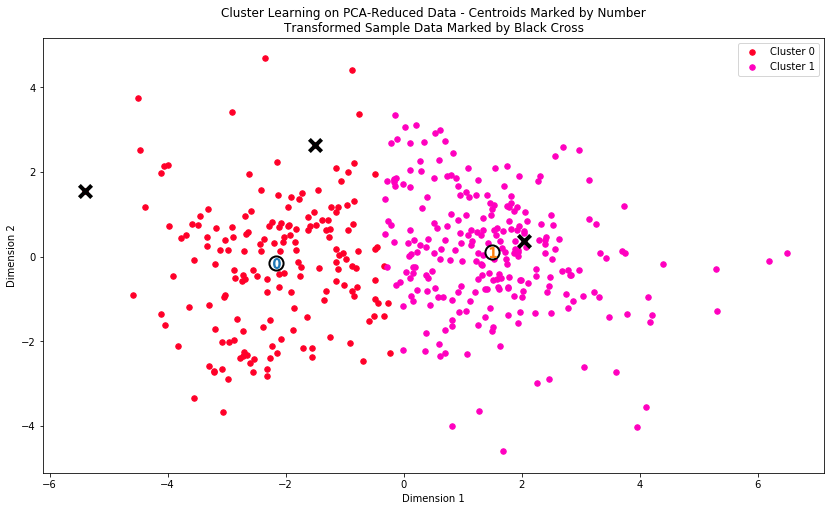

In [69]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [74]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4782.0,8060.0,11972.0,1013.0,4578.0,1117.0
Segment 1,9282.0,1865.0,2389.0,2102.0,294.0,737.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [71]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
Cluster 1 / Segment 1: With all values being below the mean, I believe establishments here are typically smaller in nature and may be small restaurants that serve fresh meals.

Cluster 0 / Segment 0: This grouping has significantly higher spending for Milk, Grocery, and Detergents_Paper compared to Cluser 1 and compared to the mean.  These establishments are likely to be distributors or wholesalers who provide specific categories of items to other businesses.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [75]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [76]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18291,1266,21042,5373,4173,14472
1,16117,46197,92780,1026,40827,2944
2,9658,2182,1909,5639,215,323


**Answer:**

These were my original predictions for the sample points.

Point 0 - #71 might be a sandwich restaurant

Point 1 - #85 might be a midsize grocery store

Point 2 - #99 might be a small business corner shop or gas station

Point 0 has been predicted to be in Cluster 0, but I thought this would fall into Cluster 1.  Cluster 1 represents smaller establishments based on my description from Question 8.  After looking at the data again for Point 0, the high spending in Fresh, and Delicatessen could still indicate that this is a restaurant.   

Point 2 has been predicted to be in Cluster 1, and I agree that it should be in Cluster 1 since there is higher spending on Milk, Grocery, and Detergents_Paper.

Point 1 is predicted to be in Cluster 0 and based on high spending in Milk, Grocery, Detergents_Paper, I would agree as I thought it would be a grocery store.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
I don't think this change would affect all customers equally.  Those who have less of a dependence on Fresh items, would likely not be affected. Those looking to provide Fresh items would probably prefer service at 5 days a week.

To test this, the distributor could choose a small subset the up customers in each segement and offer each subset the different service.  For each subset, they could measure the response to determine if they should apply the change to all customers within a given segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
If all the customers now had labeled data that indicated their customer segment, the wholesaler could fit the data to a supervised learner (Linear Classifier maybe).  From here they could pass in the new customer data to make predictions on the target feature (customer segment).



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

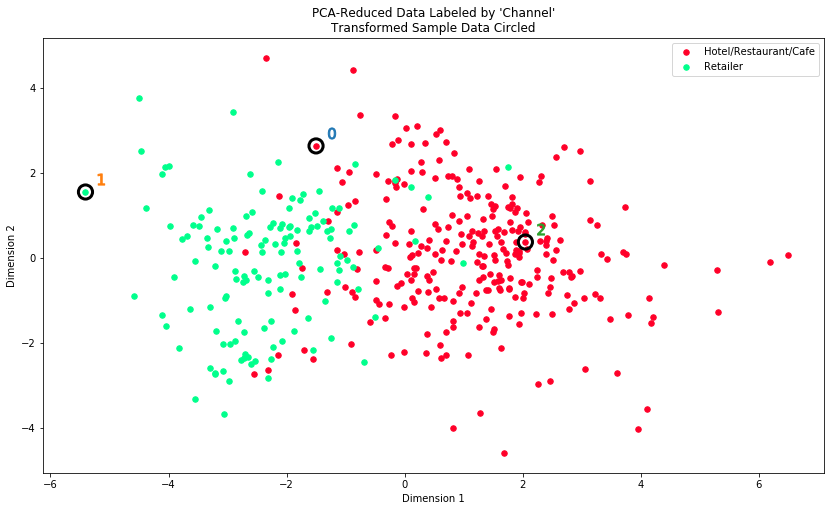

In [77]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
Looking at the clustering chart, I would say the number of clusters and the use of KMeans does a good job of reflecting the difference between the Channels (Retailer vs HoReCa).  The majority of the data points to the right of 0 on Dimension 1 are HoReCA customers, while the majority of data on the left are for Retailer customers.  Between 0 and -2 on Dimension 1, there are a few datapoints for both customer types, which can be expected as small establishments in both segments may have similar purchasing patterns.

I would think that datapoints more to the right would be considered pure Hotel/Restaurant/Cafe and datapoints to the far left would be pure Retailers.

Sample 2 and 1 are definitely inline with expectations, but sample 0 exists in that region between 0 and -2 on the Dimension 1 axis.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.